In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('/content/Churn.csv')
x = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [3]:
dataset

RowNumber  CustomerId    Surname  ...  IsActiveMember EstimatedSalary Exited
0             1    15634602   Hargrave  ...               1       101348.88      1
1             2    15647311       Hill  ...               1       112542.58      0
2             3    15619304       Onio  ...               0       113931.57      1
3             4    15701354       Boni  ...               0        93826.63      0
4             5    15737888   Mitchell  ...               1        79084.10      0
...         ...         ...        ...  ...             ...             ...    ...
9995       9996    15606229   Obijiaku  ...               0        96270.64      0
9996       9997    15569892  Johnstone  ...               1       101699.77      0
9997       9998    15584532        Liu  ...               1        42085.58      1
9998       9999    15682355  Sabbatini  ...               0        92888.52      1
9999      10000    15628319     Walker  ...               0        38190.78      0

[10000 rows x 14 columns]

# New Section

In [ ]:
from google.colab import files
uploaded = files.upload

sample_data/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
geography=pd.get_dummies(dataset["Geography"],drop_first=True)
gender=pd.get_dummies(dataset['Gender'],drop_first=True)

In [5]:
x=pd.concat([x,geography,gender],axis=1)

In [6]:
x=x.drop(['Geography','Gender'],axis=1)

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [9]:
x_test

CreditScore  Age  Tenure  ...  Germany  Spain  Male
9394          597   35       8  ...        1      0     0
898           523   40       2  ...        0      0     0
2398          706   42       8  ...        0      1     0
5906          788   32       4  ...        0      0     1
2343          706   38       5  ...        1      0     1
...           ...  ...     ...  ...      ...    ...   ...
1037          625   24       1  ...        0      0     0
2899          586   35       7  ...        0      0     0
9549          578   36       1  ...        0      1     1
2740          650   34       4  ...        1      0     1
6690          573   30       8  ...        1      0     1

[2000 rows x 11 columns]

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [15]:
from keras.layers import Dense

In [17]:
from keras.models import Sequential
classifier = Sequential()


In [23]:

classifier.add(Dense(6,activation='relu'))

In [24]:

classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [ ]:

model_history=classifier.fit(x_train, y_train,validation_split=0.33, batch_size = 10,epochs = 100,)


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


KeyError: ignored

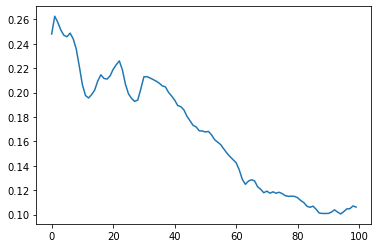

In [30]:

print(model_history.history.keys())
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


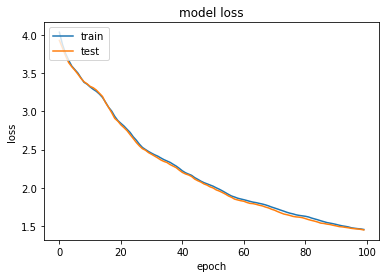

In [31]:

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [33]:

y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)


In [37]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)


ValueError: ignored

In [39]:
accuracy = classifier.evaluate(x, y)
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 0s 1ms/step - loss: 8.2654 - accuracy: 0.4159


TypeError: ignored